### Analisis de Datos de pruebas de Produccion - Historico 2002 - 2020

Datos obtenido del Software **LOWIS** (Life of Well Information Software)

In [1]:
import datetime # Libreria para el manejo de fechas
import numpy as np # Optimizacion de operaciones con matrices
import pandas as pd # Manipulacion  de los datos.

import matplotlib.pyplot as plt # Visualizacion de datos
import seaborn as sns # Libreria de Visualizacion de datos mas

%matplotlib inline



### Funciones Utilizadas:

In [2]:
def get_missing_values_df(df):
    
    """ Esta funcion recibe como parametro un dataframe y devuelve un dataframe
        con la cantidad y el porcentaje de datos faltantes por atributo.
        return DataFrame: columns [atributo, missing_values, percent]
    """
    
    missing_values_amount = df.isna().sum()
    missing_values_percent = (missing_values_amount / len(df)).round(6) * 100
    missing_df = pd.DataFrame({
        "atributos": df.columns,
        "missing_values": missing_values_amount,
        "percent": missing_values_percent
    })

    top_missing_values = missing_df.loc[missing_df['missing_values']>0].sort_values(by='missing_values', ascending=False)
    top_missing_values.reset_index(drop=True)
    
    return top_missing_values

def plot_bar(df, x_name, y_name, main_title=None, width=15, height=5, 
             rot_label=45, palette_c=None, x_title=None, y_title=None):
    
    """Esta funcion recibe parametros de configuracion 
        para hacer un plot de tipo barra
        return BarPlot
    """
    
    if not x_title:
        x_title = x_name
    if not y_title:
        y_title = y_name
    if not main_title:
        main_title = '{} VS {}'.format(x_name, y_name)
        
    
    plt.figure(figsize=(width, height))
    chart = sns.barplot(x=x_name, y=y_name, data=df, palette=palette_c)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=rot_label)
    chart.set_xlabel(x_title)
    chart.set_ylabel(y_title)
    chart.set_title(main_title)
    plt.show()

def plot_boxplot(serie):
    chart = sns.boxplot(x=serie)
    plt.xlabel(serie.name)
    plt.show()
    
    

def plot_heatmap(df, x_name, y_name, main_title=None, width=15, height=5, 
                 palette_c=None, x_title=None, y_title=None):
    
    """ Esta funcion recibe parametros de configuracion y hace un plot de un heatmap
        Ideal para mostrar la ocurrencia de los datos faltantes.
    """
    
    if not x_title:
        x_title = x_name
    if not y_title:
        y_title = y_name
    if not main_title:
        main_title = '{} VS {}'.format(x_name, y_name)
        
    plt.figure(figsize=(width, height))
    chart = sns.heatmap(df.isnull(), cbar=False)
    chart.set_xlabel(x_name)
    chart.set_ylabel(y_name)
    chart.set_title(main_title)
    plt.show()

def plot_hist(serie):
    serie.hist()
    plt.xlabel(serie.name)
    plt.ylabel("Frequency")
    #plt.title(serie.name, " VS Frequency".format(serie.name))
    plt.show()

def plot_feature_by_date(df, well_names, feature, r, c, operator, value):
    f, axes = plt.subplots(r, c, figsize=(15, 10), sharex=False)
    f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    f.constrained_layout = True
    
    w = 0
    for i in range(r):
        for n in range(c):
            filtered = df.loc[df['LWNAME'] == well_names[w]].copy().reset_index(drop=True)
            filtered['TESTDATE'] = filtered['TESTDATE'].astype('datetime64')
            medians = np.full(
                        shape=len(filtered),
                        fill_value=filtered[feature].median(),
                        dtype=np.float)
            means = np.full(
                        shape=len(filtered),
                        fill_value=filtered[feature].mean(),
                        dtype=np.float)
            line_medians = pd.DataFrame({"medians": medians, "means": means, "Date": filtered['TESTDATE']})
            
            sns.lineplot(x="Date", y="medians", data=line_medians, color="orange", ax=axes[i, n])
            sns.lineplot(x="Date", y="means", data=line_medians, color="green", ax=axes[i, n])
            sns.scatterplot(x="TESTDATE", y=feature, data = filtered, 
                estimator = sum, ci = None, ax=axes[i, n])
            if operator == 'less':
                sns.scatterplot(x="TESTDATE", y=feature, data = filtered.loc[filtered[feature]<value], 
                estimator = sum, ci = None, ax=axes[i, n], color='red')
            elif operator == 'greater':
                sns.scatterplot(x="TESTDATE", y=feature, data = filtered.loc[filtered[feature]>value], 
                estimator = sum, ci = None, ax=axes[i, n], color='red')
            
            
            axes[i, n].set_xlim([filtered['TESTDATE'].iloc[0], filtered['TESTDATE'].iloc[-1]])
            axes[i, n].set_title(well_names[w])
            w+=1
            
    plt.tight_layout()
    plt.show()

def get_unique_values_by_col(df, col_name):
    
    """ Obtiene los valores unicos para una determinada columna """
    
    uniques = df[col_name].unique().tolist()
    return uniques

def change_value(df, col_name, curr_value, new_value):
    
    """ Esta funcion renombra el valor originar de un grupo determinado de celdas bajo una condicion
        las celdas deben ser igual al valor actual (curr_value)
    """
    
    mask = df[col_name] == curr_value
    df.loc[mask, col_name] = new_value
    
    return df

def cust_desc(serie):
    return pd.DataFrame(serie.describe()).T

def filter_by_num(df, col, number, cols_to_show, operator='less_equal'):
    """ Esta funcion filtra el data frame por valores configurables
    
     operator: [less_equal, greater_equal, less, greater]
    """
    if operator == 'greater_equal':
        return df.loc[df[col] >= number].reset_index(drop=True).loc[:,cols_to_show].copy()
    elif operator == 'less_equal':
        return df.loc[df[col] <= number].reset_index(drop=True).loc[:,cols_to_show].copy()
    elif operator == 'equal':
        return df.loc[df[col] == number].reset_index(drop=True).loc[:,cols_to_show].copy()
    elif operator == 'less':
        return df.loc[df[col] < number].reset_index(drop=True).loc[:,cols_to_show].copy()
    elif operator == 'greater':
        return df.loc[df[col] > number].reset_index(drop=True).loc[:,cols_to_show].copy()
    else:
        print("Please check operator parameter: operators available: [less_equal, greater_equal, less, greater]")

def filter_by_well(df, well_name, cols_to_show):
    """ Esta funcion filtra el data frame por nombre de pozo """
    try:
        return df.loc[df["LWNAME"] == well_name].copy().loc[:,cols_to_show]
    except:
        print("Please check well_name:")

def sub_plot_well(df, well_names, x, y, r, c):
    f, axes = plt.subplots(r, c, figsize=(15, 10), sharex=False)
    f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    f.constrained_layout = True
    
    w = 0
    for i in range(r):
        for n in range(c):
            try:
                filtered = filter_by_well(df, well_names[w], poss_vars + operational_vars).reset_index(drop=True)
                sns.regplot(x=x, y=y, data=filtered, ax=axes[i, n], scatter_kws={"color": "skyblue"}, line_kws={"color": "blue"})
                sns.scatterplot(x=x, y=y, data=filtered.loc[filtered[y]<0], ax=axes[i, n], color='red')
                axes[i, n].set_title(well_names[w])
                w+=1
            except:
                pass
    plt.tight_layout()
    plt.show()

def sub_plot_histobox(df, var):
    f, (axe1, axe2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
    f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    f.constrained_layout = True
    
    sns.distplot(df.loc[:,var], ax=axe1, kde=False)
    sns.boxplot(x=var, data=df, ax=axe2)
    
    f.tight_layout()
    plt.tight_layout()
    plt.show()

def plot_corr_pearson(df):
    colormap = plt.cm.RdBu
    plt.figure(figsize = (25,20))
    plt.title('Pearson Correlation of features', y = 1.05, size = 15)
    ax = sns.heatmap(df.corr(), 
                     linewidth = 0.1, 
                     vmax = 1.0, 
                     cmap = colormap, 
                     linecolor = 'white', 
                     cbar=True, fmt='.2f',
                     annot=True,
                     annot_kws={
                         "weight": "bold",
                         "size": 15,
                     })
    for label in ax.get_yticklabels():
        label.set_size(15)
        label.set_weight("bold")
        label.set_color("black")
    for label in ax.get_xticklabels():
        label.set_size(15)
        label.set_weight("bold")
        label.set_color("black")
    plt.show()

### Constantes

In [3]:
FILEPATH = '../DATA SOURCE/PRODUCTION TEST/pruebasdepozo_20200108_Copy.csv' #Ruta al archivo csv de Pruebas.
df = pd.read_csv(FILEPATH) #Lectura del DataFrame
df['TESTDATE'] = pd.to_datetime(df['TESTDATE'])
df['WTINSTDATE_Y'] = pd.to_datetime(df['WTINSTDATE_Y'])
df['SOURCE'] = 0 

### Visualizacion de las primeras 5  y ultimas filas para revisar que se hayan cargado bien los datos.

In [4]:
df.head()

,LWNAME,TESTDATE,TESTTIME,TESTHRS,ZONECODE,WTINSTDATE_Y,WTPUMPSIZE,PPR_WTPUMPSIZE,WTPMPRPM,WTCUMMREVS,...,TSTCOMNT,WTPRECOMMENT,WTDILVEHCO,WTSHRINKAG,WTDCOGOR,WTDHDILINJ,TSTOILGRAV,SPTCHGUSER,SPTCHGTMSP_Y,SOURCE
0,B5 P03,2002-06-20,17:20,0.0,AMV-235/255,2002-02-21,0.00,110.0,0.0,0.00,...,NaN,NaN,0.00,0.00,0.0,NaN,0.0,mcanizalez,12/31/1969,0
1,C5 P12,2003-11-12,18:47,12.0,AMV-125,2001-12-13,0.00,110.0,300.0,0.00,...,NaN,NaN,0.97,0.97,33.0,NaN,0.0,marodriguez,12/31/1969,0
2,G1 P01,2017-06-14,8:51,6.0,AMV-144/135,2016-09-09,2.91,50.0,110.0,35.46,...,Buena,Bombeo DCO,0.31,1.00,27.0,NaN,8.5,HANM,6/15/2017,0
3,E4 P13,2017-06-14,9:41,12.0,AMV-165,2014-12-30,1.65,27.0,150.0,202.17,...,Buena,Bombeo DCO,0.33,1.00,27.0,NaN,8.6,HANM,6/15/2017,0
4,G2 P05RE,2017-06-13,11:59,6.0,AMV-144,2016-09-13,5.99,98.0,50.0,6.46,...,Buena,Prueba Valida,0.32,1.00,27.0,#,8.5,MORENOOJ,6/18/2017,0


In [5]:
df.tail()

,LWNAME,TESTDATE,TESTTIME,TESTHRS,ZONECODE,WTINSTDATE_Y,WTPUMPSIZE,PPR_WTPUMPSIZE,WTPMPRPM,WTCUMMREVS,...,TSTCOMNT,WTPRECOMMENT,WTDILVEHCO,WTSHRINKAG,WTDCOGOR,WTDHDILINJ,TSTOILGRAV,SPTCHGUSER,SPTCHGTMSP_Y,SOURCE
48207,L4 P08,2019-12-28,7:00,5.0,AMV-135/145,2018-08-29,1.10,18.0,325.0,77.13,...,Buena,Prueba Valida,0.55,1.0,27.0,NaN,9.00,PIAMOG,12/30/2019,0
48208,L4 P10,2019-12-28,13:00,5.0,AMV-144,2019-09-07,2.29,35.0,230.0,29.34,...,Buena,Prueba valida,0.59,1.0,27.0,NaN,8.01,PIAMOG,12/30/2019,0
48209,L4 P05,2019-12-29,7:00,8.0,AMV-135/145,2018-08-04,3.77,60.0,200.0,0.00,...,Buena,prueba Valida,0.45,1.0,27.0,NaN,8.60,PIAMOG,12/30/2019,0
48210,H2 P14,2019-12-29,10:00,5.0,AMV-125,2015-07-05,0.00,31.0,100.0,285.17,...,Manual Test,NaN,0.54,1.0,27.0,NaN,8.10,ESCOBARGB,12/30/2019,0
48211,L3A P07,2019-12-02,20:30,8.0,AMV-185,2017-09-30,0.00,80.0,74.0,0.00,...,Buena,alto corte de agua,0.44,1.0,27.0,#,8.50,PIAMOG,1/3/2020,0


In [6]:
poss_vars = ['LWNAME', 'OIL', 'SEP_OIL', 'WATER', 'SEP_WATER', 'GAS', 'SEP_GAS', 'TOTALFLD', 'TSTOILGRAV', 'H2OCUT', 'WTDILURATE', 'WTDILVEHCO']
operational_vars = ['WTPIP', 'WTPDP', 'WTPIT', 'WTPDT', 'WTPMPRPM', 'PPR_WTPUMPSIZE', 'WTPUMPSIZE', 'WTPMPTORQUE', 'WTCUMMREVS']

### Dimensiones de los datos

In [7]:
dimensions = pd.DataFrame({"No. Atributos": [df.shape[1]], "No. Filas": [df.shape[0]]})
dimensions

,No. Atributos,No. Filas
0,53,48212


### Eliminar espacios sobrantes en las columnas de tipo "str"

In [8]:
df[df.columns] = df.apply(lambda x: x.str.strip() if type(x) == 'str' else x)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

### Conocer el tipo de datos y el espacio en memoria que ocupan

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48212 entries, 0 to 48211
Data columns (total 53 columns):
LWNAME            48212 non-null object
TESTDATE          48212 non-null datetime64[ns]
TESTTIME          48212 non-null object
TESTHRS           48212 non-null float64
ZONECODE          48212 non-null object
WTINSTDATE_Y      48212 non-null datetime64[ns]
WTPUMPSIZE        48212 non-null float64
PPR_WTPUMPSIZE    48212 non-null float64
WTPMPRPM          48212 non-null float64
WTCUMMREVS        48212 non-null float64
WTPIP             48212 non-null float64
WTPIT             48212 non-null float64
WTPDP             48212 non-null float64
WTPDT             48212 non-null float64
WTDIFFPRES        48212 non-null float64
WTDRAWPRES        48212 non-null float64
WTTBNGPRES        48212 non-null float64
WTPMPTORQUE       48212 non-null float64
WTMETPRESS        48212 non-null float64
WTMETTEMPR        48212 non-null float64
WTDCORATE         48212 non-null float64
WTDILURATE        4

### Conocer la cantidad de datos nulos por columnas de forma General

In [10]:
missing_values = get_missing_values_df(df)
missing_values

,atributos,missing_values,percent
WTDHDILINJ,WTDHDILINJ,46443,96.3308
WTPRECOMMENT,WTPRECOMMENT,10493,21.7643
TSTCOMNT,TSTCOMNT,1758,3.6464
SPTCHGUSER,SPTCHGUSER,415,0.8608
WTDILVEHCO,WTDILVEHCO,357,0.7405
WTSHRINKAG,WTSHRINKAG,357,0.7405
WTDCOGOR,WTDCOGOR,357,0.7405
TSTOILGRAV,TSTOILGRAV,357,0.7405
SPTCHGTMSP_Y,SPTCHGTMSP_Y,357,0.7405
WTEQUIPMNT,WTEQUIPMNT,2,0.0041


### Visualizacion de los datos faltantes General

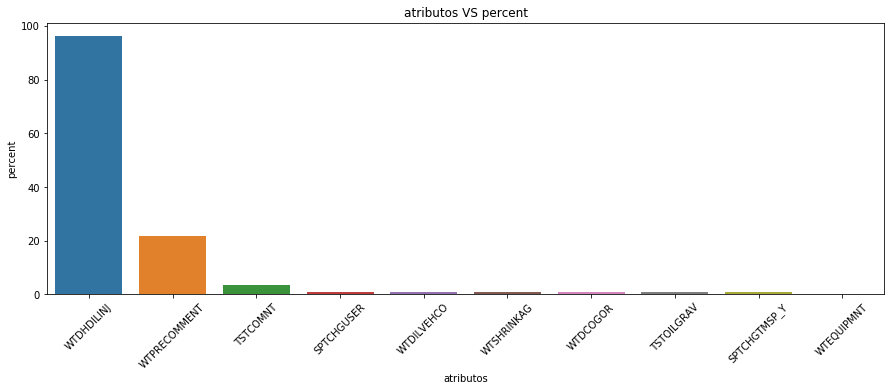

In [11]:
plot_bar(missing_values, "atributos", "percent")

### Ocurrencias de datos faltantes General

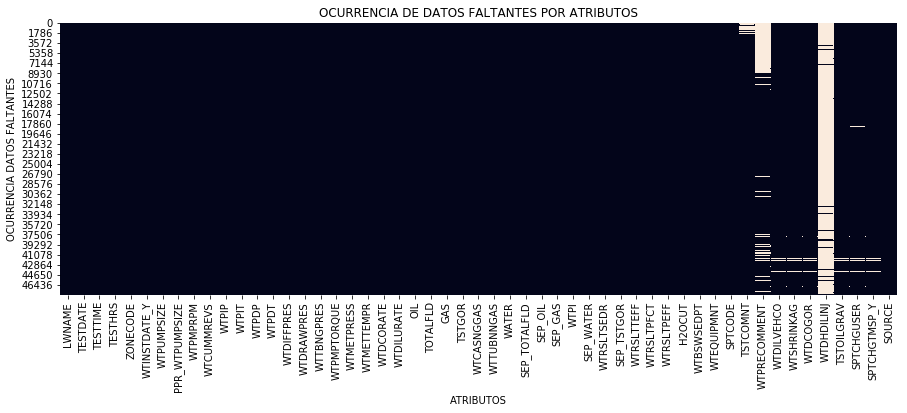

In [12]:
plot_heatmap(df, "ATRIBUTOS", "OCURRENCIA DATOS FALTANTES", "OCURRENCIA DE DATOS FALTANTES POR ATRIBUTOS")

**<center>Conclusiones Datos Faltantes General<center>**
    
    - Las visualizaciones previa permite conocer la cantidad, porcentaje y ocurrencia de valores faltantes, lo cual permite tomar decisiones a la hora de operar con los datos.

   
   * **WTDHDILINJ**: atributos con mayor numeros de datos faltantes (96% de los datos). Es probable que sea una variable a eliminar del conjunto de datos.
   
   
   * **WTPRECOMMENT**: atributos con 21% de valores faltantes. Esta variable sera eliminada ya que no es determinante para el modelo final.
   
   
   * **TSTCOMNT**: Este atributo sera eliminado ya que no es determinante para el modelo final.
   
   
   * **SPTCHGUSER**: Este atributo sera elminado ya que no es determinante para el modelo final.
   
   
   * **SPTCHGTMSP_Y**:Este atributo por ahora no se considera determinte para el modelo final.
   
   
   * **TSTOILGRAV**: Atributos con apenas 0.74% de valores faltantes, posibles medidas a toma:
   
   
        - evaluar estadistica descriptiva de los datos, mediciones de centralizacion (media, median, moda...) considerando que es una propiedad que no varia mucho, esto ayudara a inferir los valores faltantes
   
        - como ultimo recurso eliminar las filas donde falta este atributo ya que no representa ni el 1% del conjunto total de los datos.
        
    
   * **WTDCOGOR**: La estadistica descriptiva ayudara a tomar desiciones en la ausencia de valores faltantes, haciendo un analisis de esta propiedad por pozos. Respectivamente para el resto de missing values.
    
    
   * **WTDILVEHCO**: 
   
   * **WTEQUIPMNT**:
   
   * **WTSHRINKAG**:

### Vamos eliminar variables que por ahora sabemos que no formaran parte del modelo final

* Comentarios, usuarios validador de la prueba

In [43]:
data = df.drop(['SPTCHGUSER', 'WTDHDILINJ', 'TESTTIME', 'TESTHRS', 'SPTCHGTMSP_Y', 'SPTCODE'], axis=1).reset_index(drop=True)

### Formateo del atributo WTEQUIPMNT

In [44]:
print(data['WTEQUIPMNT'].unique())
data['WTEQUIPMNT'] = data['WTEQUIPMNT'].str.strip()
data['WTEQUIPMNT'] = data['WTEQUIPMNT'].str.capitalize()
data['WTEQUIPMNT'] = data['WTEQUIPMNT'].str.replace("Separador", "Separator")
data['WTEQUIPMNT'] = data['WTEQUIPMNT'].str.replace("Simeflun", "Simeflum")
data['WTEQUIPMNT'] = data['WTEQUIPMNT'].str.replace('Simeflum', "Simeflum")
data['WTEQUIPMNT'] = data['WTEQUIPMNT'].str.replace('Simelum', "Simeflum")
mask1 = data['WTEQUIPMNT'] == '' 
mask2 = data['WTEQUIPMNT'] == '0'
data.loc[mask1, 'WTEQUIPMNT'] = np.nan
data.loc[mask2, 'WTEQUIPMNT'] = np.nan
data['WTEQUIPMNT'].unique().tolist()

[nan 'Roxar' 'AGAR' 'SEPARATOR' 'Agar' 'Separator' 'SIMEFLUM' ''
 'Separador' 'separator' 'Simeflum' 'TANQUE' 'simeflum' 'SIMEFLUN'
 'SIMELUM' 'SEPARADOR' 'agar' '0' 'aGAR']


[nan, 'Roxar', 'Agar', 'Separator', 'Simeflum', 'Tanque']

### Formateo del atributo ZONECODE

Arenas Productoras:
* AMV-125
* AMV-135
* AMV-144
* AMV-145
* AMV-155
* AMV-165
* AMV-175
* AMV-185
* AMV-200
* AMV-235
* AMV-245
* AMV-255

Para este Dataset el atributo ZONECODE representa las arenas drenadas por el pozo.

In [45]:
print(data['ZONECODE'].unique())
data['ZONECODE'] = data['ZONECODE'].str.replace(' ', '-')
data['ZONECODE'] = data['ZONECODE'].str.strip().str.replace(' ','-')
to_renames = {
    "144": "AMV-144",
    "135/144": "AMV-135/144",
    "AMV-134/145": "AMV-135/145",
    "AMV-145/135": "AMV-135/145",
    "AMV-144/135": "AMV-135/144",
    "AMV135/145": "AMV-135/145"
}
for curr, new in to_renames.items():
    data = change_value(data, "ZONECODE", curr, new)
data['ZONECODE'].unique()

['AMV-235/255' 'AMV-125' 'AMV-144/135' 'AMV-165' 'AMV-144' 'AMV-155'
 'AMV-135/145' 'AMV-165/175' 'AMV-235' 'AMV-255' 'AMV-145' 'AMV-135'
 'AMV-135/144' 'AMV-175' '144' '135/144' 'AMV135/145' 'AMV 135/145'
 'AMV 135/144' 'AMV-125/135' 'AMV-125/135/145' 'AMV-134/145' 'AMV-175/165'
 'AMV-185' 'AMV-145/135']


array(['AMV-235/255', 'AMV-125', 'AMV-135/144', 'AMV-165', 'AMV-144',
       'AMV-155', 'AMV-135/145', 'AMV-165/175', 'AMV-235', 'AMV-255',
       'AMV-145', 'AMV-135', 'AMV-175', 'AMV-125/135', 'AMV-125/135/145',
       'AMV-175/165', 'AMV-185'], dtype=object)

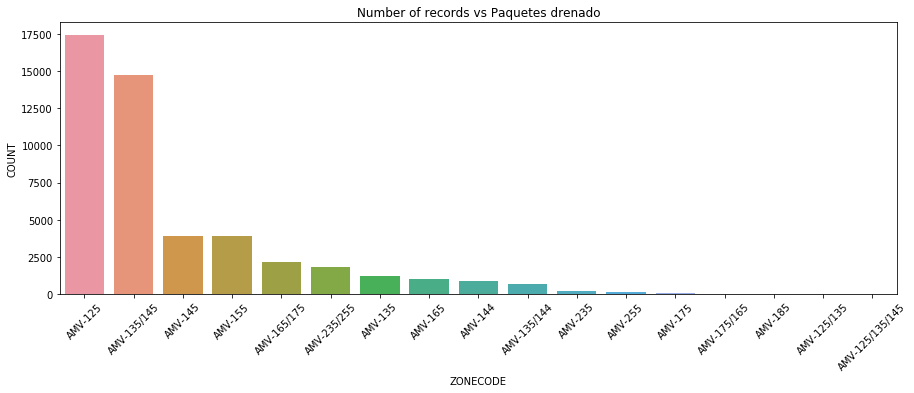

In [46]:
zonecodes = pd.DataFrame(data.groupby(by='ZONECODE').size()).reset_index()
zonecodes.columns = ['ZONECODE', 'COUNT']
zonecodes = zonecodes.sort_values(by='COUNT', ascending=False)
plot_bar(zonecodes, "ZONECODE", "COUNT", "Number of records vs Paquetes drenado")

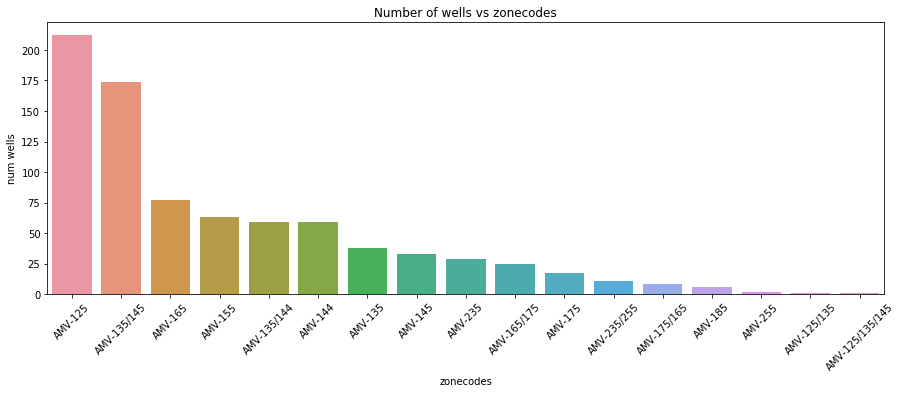

In [47]:
lengths = []
zone = []
i = 0
for key, values in data.groupby(['ZONECODE'])['LWNAME'].unique().items():
    lengths.append(len(values))
    zone.append(key)
    i+=1
wells_by_zonecodes = pd.DataFrame({"zonecodes": zone, "num wells": lengths})
wells_by_zonecodes = wells_by_zonecodes.sort_values(by='num wells', ascending=False)
plot_bar(wells_by_zonecodes, "zonecodes", "num wells", "Number of wells vs zonecodes")

### Numero Total de pozos

In [48]:
"Numero total de pozos: ", len(data['LWNAME'].sort_values().unique().tolist())

('Numero total de pozos: ', 815)

### Analisis de las variables.

* Analisis estadistico de cada una de las variables en busca de valores atipicos (OUTLIERS)

Analizar primero variables operacionales las cuales son mas propensas a tener outliers ya que dependen directamente de los sensores los cuales por cualquier razon puede arrojar valores atipicos, normalmente un valor atipico para un sensor o es un valor maximo o un valor minimo. Teniendo consideraciones de lo que fisicamente es correcto se procedera a evaluar las variables operacionales:

    * PIP: Presion en la entrada de la bomba (psia)
    * PIT: Temperatura en la entrada de la bomba (F)
    * PDP: Presion de descarga de la bomba (psia)
    * PDT: Teperatura de descarga de la bomba (F)

## PIP: Presion de Succion de la Bomba (Psia)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


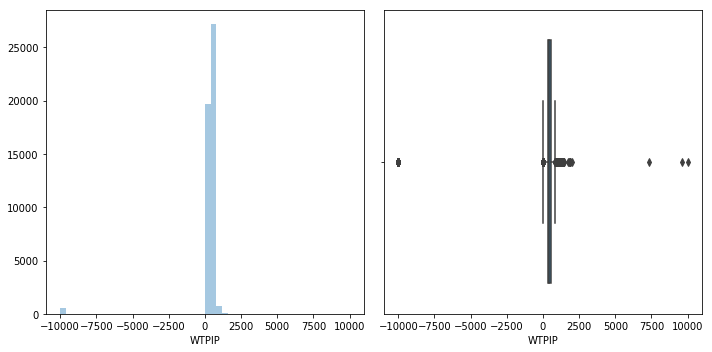

,count,mean,std,min,25%,50%,75%,max
WTPIP,48212.0,311.195069,1154.745582,-10000.0,335.63,425.415,547.6925,9999.0


In [49]:
var = "WTPIP"
serie = data[var]
sub_plot_histobox(data, serie.name)
cust_desc(serie)

podemos observar que existen valores negativos para la PIP y valores muy altos, lo cual es fisicamente imposible, se procede a sustituir todos aquellos valores menores o igual a 0 por nan (not a number) y fijamos un limite superior de PIP de 1000psia (basado en la maxima presion inicial reportada para los pozos)

In [50]:
mask = (data[var] <= 0)
print(mask.sum(), round(mask.sum()/len(data)*100, 2))
data.loc[mask, var] = np.nan

3516 7.29


3516 valores menores o igual 0 lo que representa un 7.30% del total de los datos.

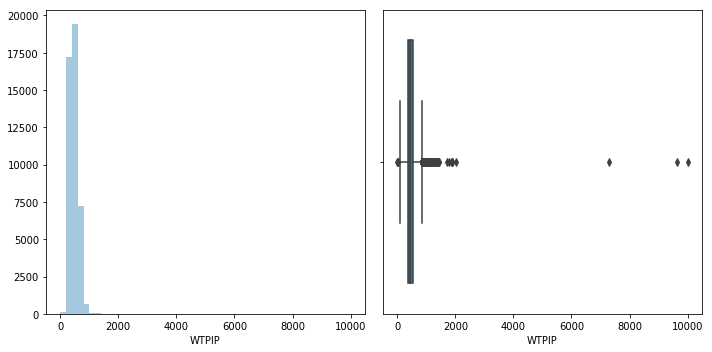

,count,mean,std,min,25%,50%,75%,max
WTPIP,44696.0,465.664397,161.337348,3.13,362.46,440.0,558.0,9999.0


In [51]:
serie = data[var]
sub_plot_histobox(data[[var]].dropna(how='any'), serie.name)
cust_desc(serie)

Existen valores de PIP muy elevados lo que es fisicamente imposible esto es data ruidosa debido a los censores. Segun las presiones iniciales reportadas para cada uno de los yacimientos del campo:

    * YAC Superior: Max presion --> 777psia
    * YAC Medio: Max presion --> 882psia
    * YAC Inferior: Max presion --> 987psia
    
Vamos analizar el comportamiento de los pozos que presentan valores superiores a los 1000psia

In [52]:
wells_unique = data.loc[(data['WTPIP'] < 100)]['LWNAME'].unique()
wells_unique

array(['H4 P11', 'H4 P13', 'C5 P09'], dtype=object)

In [59]:
data.loc[1919, 'WTPIP'] = 962.10
data.loc[3989, 'WTPIP'] = 730.00
data.loc[29994, 'WTPIP'] = 392.66
data.loc[30000, 'WTPIP'] = 392.66
data.loc[31325, 'WTPIP'] = 299.76
data.loc[47199, 'WTPIP'] = 216.00
data.loc[30813, 'WTPIP'] = 313.00
data.loc[data['WTPIP'] > 1000, 'WTPIP'] = np.nan
data.loc[1848, 'TESTDATE'] = np.datetime64('2004-12-20')
data.loc[data['WTPIP'] < 100, 'WTPIP'] = np.nan

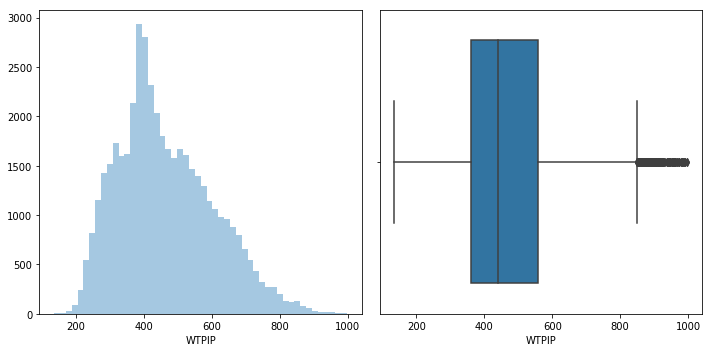

,count,mean,std,min,25%,50%,75%,max
WTPIP,44611.0,463.575905,140.447356,135.11,362.27,439.71,557.17,998.0


In [63]:
sub_plot_histobox(data[[var]].dropna(how='any'), serie.name)
cust_desc(serie)